In [19]:
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc
from pyik.mplext import plot_hist, uncertainty_ellipse
from scipy.stats import chi2
import yaml
import matplotlib.patches as mpl_patches
import mplhep as hep
rc('text', usetex=True)
import sys
sys.path.append('../HelpherFunctions/')
from Chi2Allvar import *
######
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'serf'
filename ="../results/data.yaml"
########
stream = open(filename, 'r')#
data = yaml.safe_load(stream)
########
from iminuit import Minuit
import tabulate as tab
import seaborn as sns
from matplotlib.colors import LogNorm

In [28]:
# fit function, takes the chi 2 function with selected channels via switches
def fit(func):
    m = Minuit(func,Cqu1=0,Cqt8=0,Cqtqb1=0,Cqtqb8=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    #cqu1_0, ch_0=m.values
    # print(ch_0)
    #fmin =func(cqu1_0,ch_0)
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return m.covariance.correlation()

def fit3(func):
    m = Minuit(func,Cqt=0,Cqtqb=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    #cqu1_0, ch_0=m.values
    # print(ch_0)
    #fmin =func(cqu1_0,ch_0)
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return m.covariance.correlation()

def fit4(func):
    m = Minuit(func,Cqt1=0,Cqt2=0,Cqtqb=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    #cqu1_0, ch_0=m.values
    # print(ch_0)
    #fmin =func(cqu1_0,ch_0)
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return m.covariance.correlation()

def fit2(func):
    m = Minuit(func,Cqt=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    #cqu1_0, ch_0=m.values
    # print(ch_0)
    #fmin =func(cqu1_0,ch_0)
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return m.covariance.correlation()


import pandas as pd

def fit95CL(func):
    m = Minuit(func,Cqu1=0,Cqt8=0,Cqtqb1=0,Cqtqb8=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    #cqu1_0, ch_0=m.values
    # print(ch_0)
    #fmin =func(cqu1_0,ch_0)
    Cqu1v,Cqt8v,Cqtqb1v,Cqtqb8v,Ctt1v,Cqq1v,Cqq8v,CHv = m.values
    Cqu1er,Cqt8er,Cqtqb1er,Cqtqb8er,Ctt1er,Cqq1er,Cqq8er,CHer =m.errors
    
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return {
      #  'Cqt1':Cqu1v+Cqu1er,'Cqt8':Cqt8v+Cqt8er,
        'Cqtqb1':[Cqtqb1v+Cqtqb1er],'Cqtqb8':[Cqtqb8v+Cqtqb8er],
       # 'Ctt':Ctt1v+Ctt1er,
        #'Cqq1':Cqq1v+Cqq1er, 'Cqq8':Cqq8v+Cqq8er,
        'CH':[CHv+CHer]
    }

In [21]:
operator='Cqtqb1'
CC2=1
linearl3 = True
linearmu = True 
top=0
chi2_fit_resl3 = lambda Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH : -1/2*mylikelihoodAV(Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=False,linearmu=True)
chi2_fit_linel3 = lambda Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH : -1/2*mylikelihoodAV(Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=True,linearmu=True)

In [22]:
fminres= fit(chi2_fit_resl3)  #resummed trilinear 

<ValueView Cqu1=-0.5002272251645012 Cqt8=-8.517829996708663 Cqtqb1=0.13316771925325563 Cqtqb8=0.7211436588483618 CH=-7.290406095566447>
<ErrorView Cqu1=1.5954507014661068 Cqt8=13.583633833779928 Cqtqb1=2.6522016261743286 Cqtqb8=14.200542063693593 CH=18.99605923992405>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqu1   │   -0.5    │    1.6    │            │            │         │         │       │
│ 1 │ Cqt8   │    -9     │    14     │            │            │         │         │       │
│ 2 │ Cqtqb1 │    0.1    │    2.7    │            │            │         │         │       │
│ 3 │ Cqtqb8 │     1     │    14     │            │            │         │         │       │
│ 4 │ CH     │    -7     │    19     │            │            │         │      

In [5]:
fminline = fit(chi2_fit_linel3)

<ValueView Cqu1=-0.7655644757059004 Cqt8=-9.331801058111994 Cqtqb1=0.06864757485492404 Cqtqb8=0.41115997729368337 CH=44.13986534807105>
<ErrorView Cqu1=1.4736703348715354 Cqt8=13.699757953001596 Cqtqb1=2.553404505315027 Cqtqb8=13.67033573758745 CH=77.37640906642993>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqu1   │   -0.8    │    1.5    │            │            │         │         │       │
│ 1 │ Cqt8   │    -9     │    14     │            │            │         │         │       │
│ 2 │ Cqtqb1 │    0.1    │    2.6    │            │            │         │         │       │
│ 3 │ Cqtqb8 │     0     │    14     │            │            │         │         │       │
│ 4 │ CH     │    40     │    80     │            │            │         │        

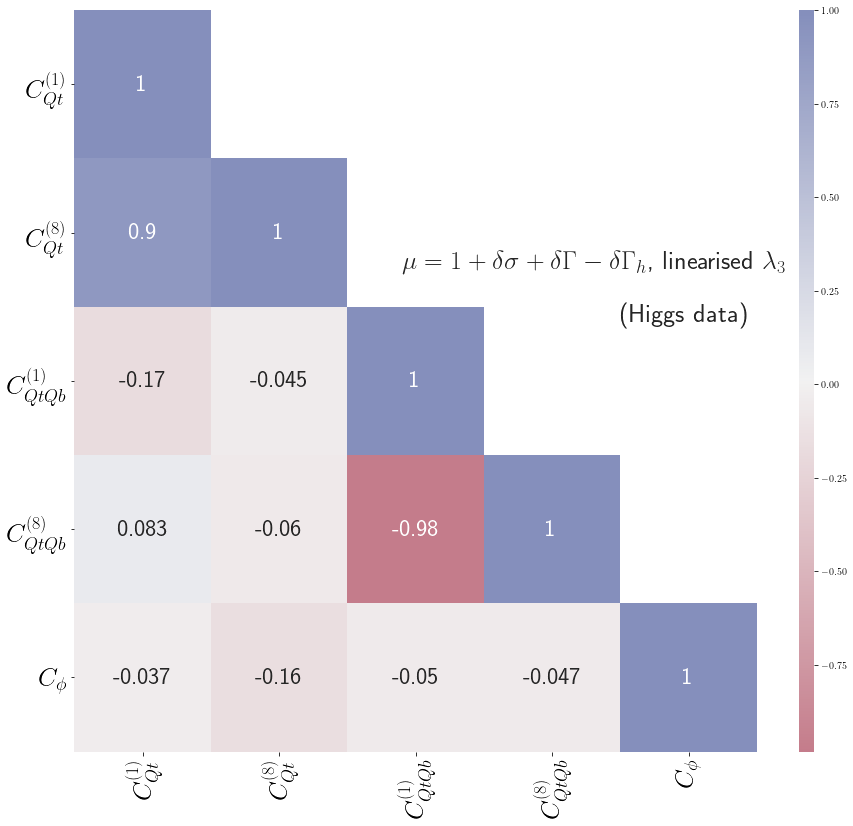

In [6]:
var=[
    r'$C_{Qt}^{(1)}$',
r'$C_{Qt}^{(8)}$',
r'$C_{QtQb}^{(1)}$',
r'$C_{QtQb}^{(8)}$',
#r'$C_{tt}^{(1)}$',
#r'$C_{QQ}^{(1)}$',
#r'$C_{QQ}^{(8)}$',
    r'$C_\phi$']
rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((fminline.shape[1],fminline.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(fminline+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.text(2.4,1.75,r"$\mu=1+\delta \sigma+\delta\Gamma-\delta \Gamma_h$,  linearised $\lambda_3$",fontsize=26)
plt.text(4,2.1,r"(Higgs data)",fontsize=26)
plt.tight_layout()

fig.savefig('complete_linearised_corr.pdf', dpi=300)

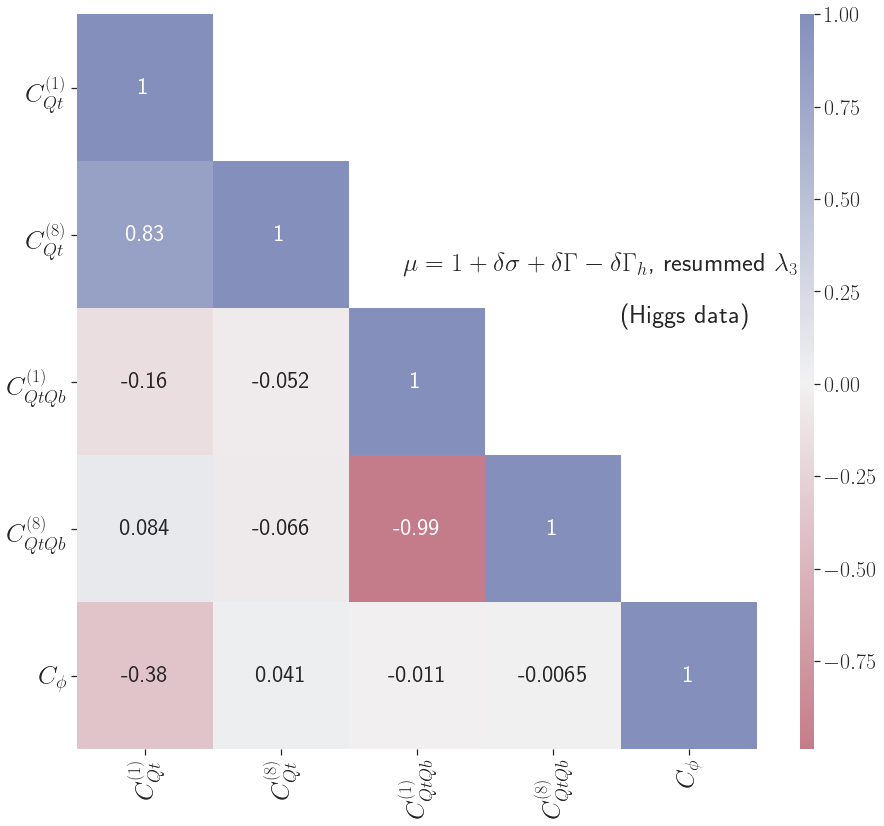

In [7]:
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((fminres.shape[1],fminres.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(fminres+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
plt.text(2.4,1.75,r"$\mu=1+\delta \sigma+\delta\Gamma-\delta \Gamma_h$,  resummed $\lambda_3$",fontsize=26)
plt.text(4,2.1,r"(Higgs data)",fontsize=26)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.tight_layout()
fig.savefig('resummed_linearised_corr.pdf', dpi=300)

In [9]:
chi2_fit_nl_resl3 =lambda Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH : -1/2*mylikelihoodAV(Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=False,linearmu=False)
chi2_fit_nl_linel3 = lambda Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH : -1/2*mylikelihoodAV(Cqu1,Cqt8,Cqtqb1,Cqtqb8,CH,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=True,linearmu=False)

In [10]:
fmin_nl_res= fit(chi2_fit_nl_resl3) 

<ValueView Cqu1=0.2823027623637695 Cqt8=-8.245093848046354 Cqtqb1=0.12323897555523229 Cqtqb8=0.5831593315638252 CH=-7.011325631112681>
<ErrorView Cqu1=1.396203998918021 Cqt8=10.696153369764918 Cqtqb1=2.2410205677903696 Cqtqb8=12.001559438507575 CH=18.369093223224446>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqu1   │    0.3    │    1.4    │            │            │         │         │       │
│ 1 │ Cqt8   │    -8     │    11     │            │            │         │         │       │
│ 2 │ Cqtqb1 │    0.1    │    2.2    │            │            │         │         │       │
│ 3 │ Cqtqb8 │     1     │    12     │            │            │         │         │       │
│ 4 │ CH     │    -7     │    18     │            │            │         │       

In [11]:
fmin_nl_l= fit(chi2_fit_nl_linel3) 

<ValueView Cqu1=-0.050029950051654296 Cqt8=-9.363338567761838 Cqtqb1=0.06916047109450317 Cqtqb8=0.3459628928082278 CH=44.665225872480036>
<ErrorView Cqu1=1.3154021476443416 Cqt8=11.38231643757501 Cqtqb1=2.4936281375076605 Cqtqb8=13.351990849951491 CH=76.0148681619305>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqu1   │   -0.1    │    1.3    │            │            │         │         │       │
│ 1 │ Cqt8   │    -9     │    11     │            │            │         │         │       │
│ 2 │ Cqtqb1 │    0.1    │    2.5    │            │            │         │         │       │
│ 3 │ Cqtqb8 │     0     │    13     │            │            │         │         │       │
│ 4 │ CH     │    40     │    80     │            │            │         │      

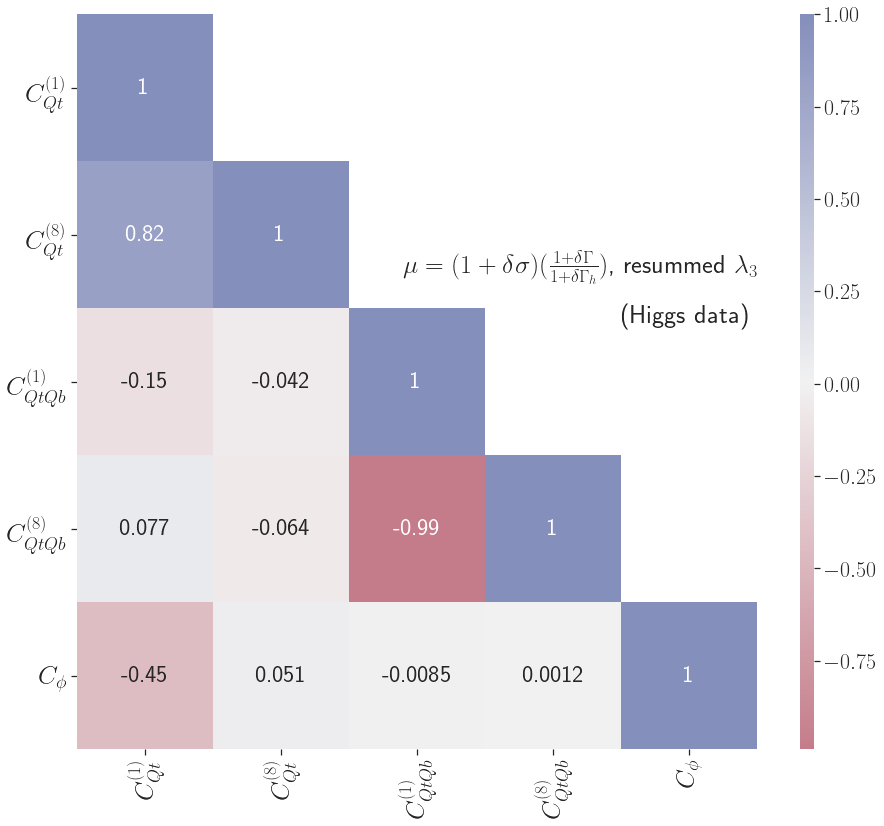

In [12]:
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((fmin_nl_res.shape[1],fmin_nl_res.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(fmin_nl_res+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
plt.text(2.4,1.75,r"$\mu=(1+\delta \sigma)(\frac{1+\delta\Gamma}{1+\delta \Gamma_h})$,  resummed $\lambda_3$",fontsize=26)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.text(4,2.1,r"(Higgs data)",fontsize=26)
plt.tight_layout()
fig.savefig('l3res_nonlinear_corr.pdf', dpi=300)

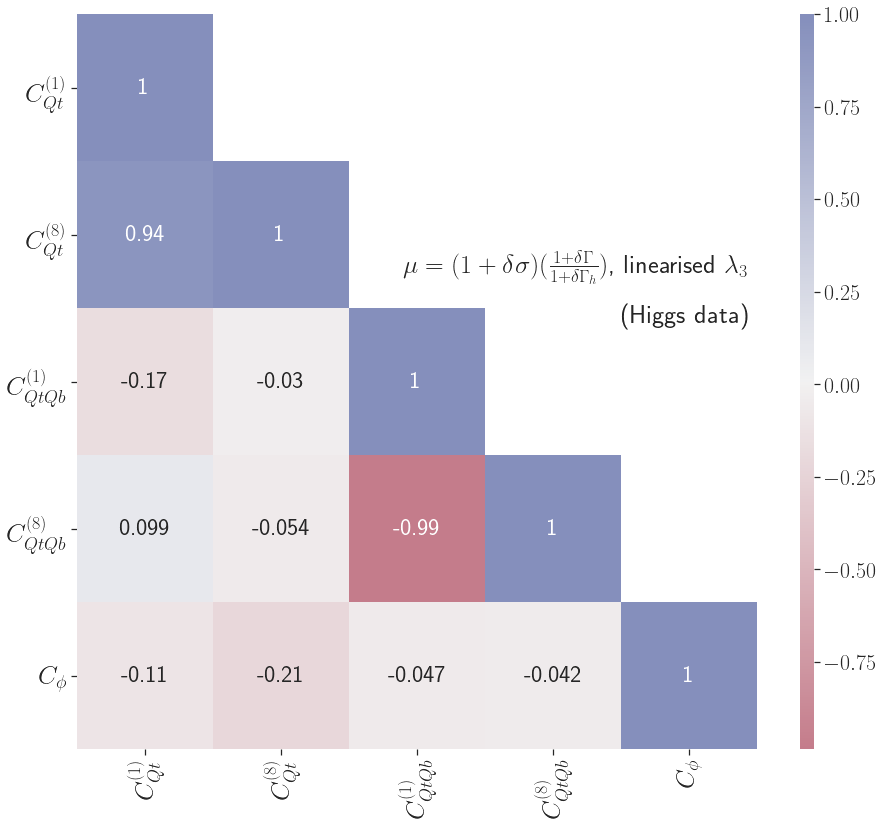

In [13]:
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((fmin_nl_l.shape[1],fmin_nl_l.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(fmin_nl_l+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
plt.text(2.4,1.75,r"$\mu=(1+\delta \sigma)(\frac{1+\delta\Gamma}{1+\delta \Gamma_h})$,  linearised $\lambda_3$",fontsize=26)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.text(4,2.1,r"(Higgs data)",fontsize=26)
plt.tight_layout()
fig.savefig('l3lin_nonlinear_corr.pdf', dpi=300)

In [26]:
CF= 4/3
Nc=3
chi2_fit_resl3 = lambda Cqt,Cqtqb,CH: -2/3*mylikelihoodAV(Cqt/2,1/2/CF*Cqt,1/(2*Nc+1)*Cqtqb/2,1/CF*Cqtqb/2,
                                                                         CH,data,experiments=['CMS','ATLAS'],
                                                                         HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],
                                                                         TopChannels=None,linearl3=False,linearmu=True)

fminline = fit3(chi2_fit_resl3)


<ValueView Cqt=0.6547319799296004 Cqtqb=0.43760651860541544 CH=-6.329699744906202>
<ErrorView Cqt=1.7787388760532712 Cqtqb=1.581013044435657 CH=18.43825063998982>
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqt   │    0.7    │    1.8    │            │            │         │         │       │
│ 1 │ Cqtqb │    0.4    │    1.6    │            │            │         │         │       │
│ 2 │ CH    │    -6     │    18     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
          Cqt    Cqtqb       CH
-----  ------  -------  -------
Cqt     1       0.27    -0.793
Cqtqb   0.27    1        0.0303
CH     -0.793   0.0303   1


In [27]:
CF= 4/3
Nc=3
chi2_fit_resl3 = lambda Cqt,Cqtqb,CH: -2/3*mylikelihoodAV(Cqt/2,1/2/CF*Cqt,1/(2*Nc+1)*Cqtqb/2,1/CF*Cqtqb/2,
                                                                         CH,data,experiments=['CMS','ATLAS'],
                                                                         HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],
                                                                         TopChannels=None,linearl3=True,linearmu=True)

fminline = fit3(chi2_fit_resl3)

<ValueView Cqt=0.28868694973255926 Cqtqb=-0.2876715471117575 CH=35.482428708083326>
<ErrorView Cqt=1.1229307831725466 Cqtqb=2.428303082325658 CH=66.61962413355376>
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqt   │    0.3    │    1.1    │            │            │         │         │       │
│ 1 │ Cqtqb │   -0.3    │    2.4    │            │            │         │         │       │
│ 2 │ CH    │    40     │    70     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
         Cqt    Cqtqb      CH
-----  -----  -------  ------
Cqt    1        0.105   0.261
Cqtqb  0.105    1      -0.759
CH     0.261   -0.759   1


In [40]:
CF= 4/3
Nc=3
#1/(2*Nc+1)*Cqtqb/2,1/CF*Cqtqb/2
chi2_fit_resl3 = lambda Cqt,CH: -2/3*mylikelihoodAV(0.,0.,1/(2*Nc+1)*Cqt/2,1/CF*Cqt/2,
                                                                         CH,data,experiments=['CMS','ATLAS'],
                                                                         HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],
                                                                         TopChannels=None,linearl3=True,linearmu=False)

fminline = fit2(chi2_fit_resl3)

<ValueView Cqt=-2.7001117860388644 CH=21.249736031392526>
<ErrorView Cqt=2.6885188670609135 CH=63.61827086913393>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqt  │   -2.7    │    2.7    │            │            │         │         │       │
│ 1 │ CH   │    20     │    60     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
       Cqt     CH
---  -----  -----
Cqt   1     -0.81
CH   -0.81   1
